Last modified: Aug. 14th, 2025 (Opal Issan, oissan@ucsd.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.general_plasma_equations import Z_prime

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Dispersion relation solver for MTSI
$$1 - \underbrace{\frac{\omega_{pe}^2}{\omega^2 }\frac{k_{\|}^2}{|\vec{k}|^2} + \frac{\omega_{pe}^2}{\Omega_{ce}^2}}_{ele
    = \frac{\omega_{pp}^2}{\alpha_{\| p}^2 k_{\perp}^2}  Z' \left( \frac{\omega - k_{\perp} U_{\perp, Dp}}{\alpha_{\| p} k_{\perp}}\right)$$

In [3]:
def cold_electron_response(k_perp_, omega, omega_pe_, k_par_):
    return - (k_par_**2)/(k_par_**2 + k_perp_**2) * (omega_pe_**2)/(omega**2) + omega_pe_**2


def ion_response(omega_pi_, alpha_i_, k_perp_, v_0_, n_, omega):
    return n_ * (omega_pi_ ** 2) / (alpha_i_ ** 2) / (k_perp_**2) * Z_prime(z=(omega - k_perp_ * v_0_) / (alpha_i_ * k_perp_))

In [4]:
# normalization
# time is normalized to the electron cyclotron frequency
# space is normalized to electron inertial length d_e

# match the NASA proposal
# cold electron density
ne = 1  # ne
# hot proton density
npH = 0.2  # ne
# cold proton density
npC = 1 - npH # ne

# mass ratios
mp_me = 100  # dimensionless
omega_pe = 4  # Omega_ce

# assume the plasma is isothermal Te=Tp=TO+=THe+
alpha_c_perp = np.sqrt(1e-4)  # d_e x Omega_ce
alpha_c_par = alpha_c_perp  # d_e x Omega_ce
alpha_p_par = alpha_c_perp / np.sqrt(mp_me)  # d_e x Omega_ce

# relative drift
UDp = 1 * alpha_p_par

In [5]:
def disp_k_(k_perp,
            k_par,
            npC_=npC,
            omega_pe_=omega_pe,
            mp_me_=mp_me,
            VDp_=UDp,
            alpha_p_par_=alpha_p_par):
    return lambda omega: 1 + cold_electron_response(k_perp_=k_perp, k_par_=k_par, omega=omega, omega_pe_=omega_pe_) \
                         - ion_response(omega_pi_=omega_pe_ / np.sqrt(mp_me_), n_=npC_,
                                        alpha_i_=alpha_p_par_,
                                        k_perp_=k_perp, v_0_=VDp_, omega=omega)


In [6]:
# quick check
k_perp =1 / alpha_c_perp   # d_e
k_par = k_perp * 1e-1
omega_guess = 0.2 / np.sqrt(mp_me) # Omega_ce

sol_approx = scipy.optimize.newton(disp_k_(k_perp=k_perp, k_par=k_par), omega_guess + 0.05j, tol=1e-17,
                                   maxiter=10000,
                                   x1=omega_guess * 0.99 + 1e-2j)
print(sol_approx)
print("omega_k + i gamma = ", sol_approx * np.sqrt(mp_me))
print("dispersion residual approx = ", abs(disp_k_(k_perp=k_perp, k_par=k_par)(sol_approx)) )

(0.41239193545999697+0.00892857466681076j)
omega_k + i gamma =  (4.12391935459997+0.0892857466681076j)
dispersion residual approx =  14.47767654521582


In [7]:
k_perp_ = np.linspace(0.25, 4.5, 50) / alpha_c_perp  # d_e
k_par_ = 0.1 * k_perp_ # d_e
sol_ = np.ones((len(k_perp_), len(k_par_)), dtype="complex128") * np.nan

In [8]:
for ii in range(len(k_perp_)):
    for jj in range(len(k_par_)):
        try:
            sol_[ii, jj] = scipy.optimize.newton(disp_k_(k_perp=k_perp_[ii], k_par=k_par_[jj]),  omega_guess + 0.005j, tol=1e-16, maxiter=10000, x1=omega_guess*0.99 + 1e-2j)
            print("dispersion residual = ", abs(disp_k_(k_perp=k_perp_[ii], k_par=k_par_[jj])(sol_[ii, jj])))
        except:
            print("An exception occurred")

dispersion residual =  1.214175959108492e-13
dispersion residual =  7.437400532047292e-14
dispersion residual =  1.7275419882519608e-12
dispersion residual =  9.923810159073884e-13
dispersion residual =  2.749812078403362e-12
dispersion residual =  3.031417504641558e-13
dispersion residual =  2.886579864025407e-15
dispersion residual =  3.730349434049641e-14
dispersion residual =  9.481304630416944e-14
dispersion residual =  1.2878707295008915e-14
dispersion residual =  8.471001677889944e-14
dispersion residual =  9.681144774731365e-14
dispersion residual =  4.107936071022057e-15
dispersion residual =  2.9976445861105405e-15
dispersion residual =  9.103828801926284e-14
dispersion residual =  2.9976040266356152e-15
dispersion residual =  7.61057935227113e-14
dispersion residual =  4.1633414221077204e-15
dispersion residual =  4.884981311627933e-15
dispersion residual =  1.0525199934695765e-13
dispersion residual =  9.395106201521596e-15
dispersion residual =  2.8865798642839952e-15
disp

/Users/oissan/PycharmProjects/EMIC_secondary_instability/QLT_equations/general_plasma_equations.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * wofz(z)
/opt/anaconda3/envs/rom/lib/python3.9/site-packages/scipy/optimize/_zeros_py.py:382: RuntimeWarning: invalid value encountered in scalar divide
  p = (-q1 / q0 * p0 + p1) / (1 - q1 / q0)
/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_26294/1788399620.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return omega_pe_**2 - (k_par_**2)/(k_par_**2 + k_perp_**2) * (omega_pe_**2)/(omega**2)


An exception occurred
dispersion residual =  6.039655356334128e-14
dispersion residual =  2.0428386781110342e-14
dispersion residual =  5.50670624056465e-14
dispersion residual =  1.7319681433806498e-14
dispersion residual =  2.895871620826658e-14
dispersion residual =  6.632344086070393e-14
dispersion residual =  8.436756584157887e-15
dispersion residual =  1.4122037230128212e-13
dispersion residual =  1.2545520455620347e-13
dispersion residual =  2.7534101379312565e-14
dispersion residual =  7.904868463275762e-14
dispersion residual =  1.0613736461023915e-13
dispersion residual =  2.464697145816135e-14
dispersion residual =  7.860407209370973e-14
dispersion residual =  5.877803567175719e-14
dispersion residual =  2.8999033159100526e-13
dispersion residual =  3.661515549050122e-13
dispersion residual =  2.1627144585280721e-13
dispersion residual =  3.931232708146307e-14
dispersion residual =  5.218052721888878e-15
dispersion residual =  2.8149943799172898e-14
dispersion residual =  7.

/Users/oissan/PycharmProjects/EMIC_secondary_instability/QLT_equations/general_plasma_equations.py:28: RuntimeWarning: overflow encountered in scalar multiply
  return -2 * (1 + z * Z(z))
/Users/oissan/PycharmProjects/EMIC_secondary_instability/QLT_equations/general_plasma_equations.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  return -2 * (1 + z * Z(z))


An exception occurred
An exception occurred
An exception occurred
An exception occurred
dispersion residual =  4.099964530042453e-15
dispersion residual =  3.6011990317837656e-15
dispersion residual =  3.3131601698423047e-15
dispersion residual =  1.1345091532888318e-15
dispersion residual =  3.838943052336674e-15
dispersion residual =  1.2472661792273243e-15
dispersion residual =  4.029975829034112e-15
dispersion residual =  4.7343206626554524e-15
dispersion residual =  2.618455766672135e-16
dispersion residual =  1.249000902703301e-16
dispersion residual =  1.4306915617612184e-15
dispersion residual =  1.5366164491566369e-15
dispersion residual =  1.965949188660863e-15
dispersion residual =  6.12235403661387e-15
dispersion residual =  2.9504581591051763e-15
dispersion residual =  2.2887833992611187e-16
dispersion residual =  4.169253327163202e-15
dispersion residual =  1.0438200033042477e-14
dispersion residual =  2.5354987979418553e-15
dispersion residual =  1.680072297996111e-15
di

FileNotFoundError: [Errno 2] No such file or directory: '/Users/oissan/PycharmProjects/EMIC_secondary_instability/figures/linear_theory/MTSI/omega_r_VD_1.0.png'

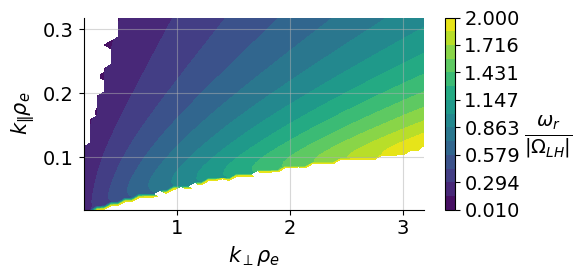

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
pos = ax.contourf(k_perp_*alpha_c_perp/np.sqrt(2), k_par_*alpha_c_perp/np.sqrt(2), sol_.real * np.sqrt(mp_me), vmin=1e-5, vmax=2, levels=np.linspace(1e-2, 2, 15))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax.set_ylabel(r'$k_{\|}\rho_{e}$', fontsize=15)
ax.set_xlabel(r'$k_{\perp}\rho_{e}$', fontsize=15)
#cbar.set_ticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7])

#ax.set_xticks([180, 200, 220, 240])
#ax.set_xlim(175, 245)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("figures/linear_theory/MTSI/omega_r_VD_" + str(round(UDp/alpha_p_par, 1)) + ".png", dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
pos = ax.contourf(k_perp_*alpha_c_perp/np.sqrt(2), k_par_*alpha_c_perp/np.sqrt(2), sol_.imag * np.sqrt(mp_me), vmin=1E-5, vmax=0.4,levels=np.linspace(1e-5, 0.4, 15))
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{LH}|}$', labelpad=20, rotation=0, fontsize=20)
ax.set_ylabel(r'$k_{\|}\rho_{e}$', fontsize=15)
ax.set_xlabel(r'$k_{\perp}\rho_{e}$', fontsize=15)
cbar.set_ticks([0.1, 0.2, 0.3, 0.4])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()

plt.savefig("figures/linear_theory/MTSI/omega_r_VD_" + str(round(UDp/alpha_p_par, 1)) + ".png", dpi=300, bbox_inches='tight')